## Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
%matplotlib inline

## Defining custom functions for further use

In [2]:
# For plotting seaborn box plot, without repeating basic codes.
def boxplot(x_col,y_col,data_df,text, font_size=20,fig_size=[16,10]):
    plt.figure(figsize=fig_size)
    plt.title(text,fontsize=font_size)
    sns.boxplot(x=x_col, y=y_col, data=data_df)
    return plt.show()

In [3]:
# For plotting seaborn bar plot, without repeating basic codes.
def barplot(x_col,y_col,data_df,text, font_size=20,fig_size=[16,10]):
    plt.figure(figsize=fig_size)
    plt.title(text,fontsize=font_size)
    sns.barplot(x=x_col, y=y_col, data=data_df)
    return plt.show()

In [4]:
# For plotting seaborn regplot, without repeating basic codes.
def regplot(x_col,y_col,data_df,text, font_size=20,fig_size=[16,10]):
    plt.figure(figsize=fig_size)
    plt.title(text,fontsize=font_size)
    sns.regplot(x=x_col, y=y_col, data=data_df)
    return plt.show()

In [5]:
# Defining a funtion to train a statsmodel OLS based model, to avoid writing repeated code.
def stats_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [6]:
# Defining a funtion calculate VIF based on columns, to avoid writing repeated code.
def calculate_vif(columns):
    df_X = X_train[columns].copy()
    vif = pd.DataFrame()
    vif['Features'] = df_X.columns
    vif['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Reading the data

In [7]:
df = pd.read_csv("./day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Removing unwanted columns

After looking at the data and insights from the data dictionary, the following variables can be removed from further analysis:

**instant** : It's an index column.

**dteday** : Since we already have seperate columns for 'year' & 'month',so I am dropping this column.

**casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Objective is to find the total count of bikes and not by specific category, I'm dropping these two columns. 

In [8]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

### Checking for missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
# How many data points are from 2018
df.loc[df['yr'] ==0,:].shape[0]

365

In [11]:
# How many data points are from 2019
df.loc[df['yr'] ==1,:].shape[0]

365

### Converting catergorical data from numeric to object

In [12]:
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
month_keys = [i for i in range (1,13)]

month_values = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

month_dict = {k:v for (k,v) in zip(month_keys, month_values)}

df['mnth'].replace(month_dict, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
weekday_keys = [i for i in range (0,7)]

weekday_values = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

weekday_dict = {k:v for (k,v) in zip(weekday_keys, weekday_values)}

df['weekday'].replace(weekday_dict, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
weathersit_keys = [i for i in range (1,5)]

weathersit_values = ['Clear', 'Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain']

weathersit_dict = {k:v for (k,v) in zip(weathersit_keys, weathersit_values)}

df['weathersit'].replace(weathersit_dict, inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Exploratory Data Analysis for data understanding

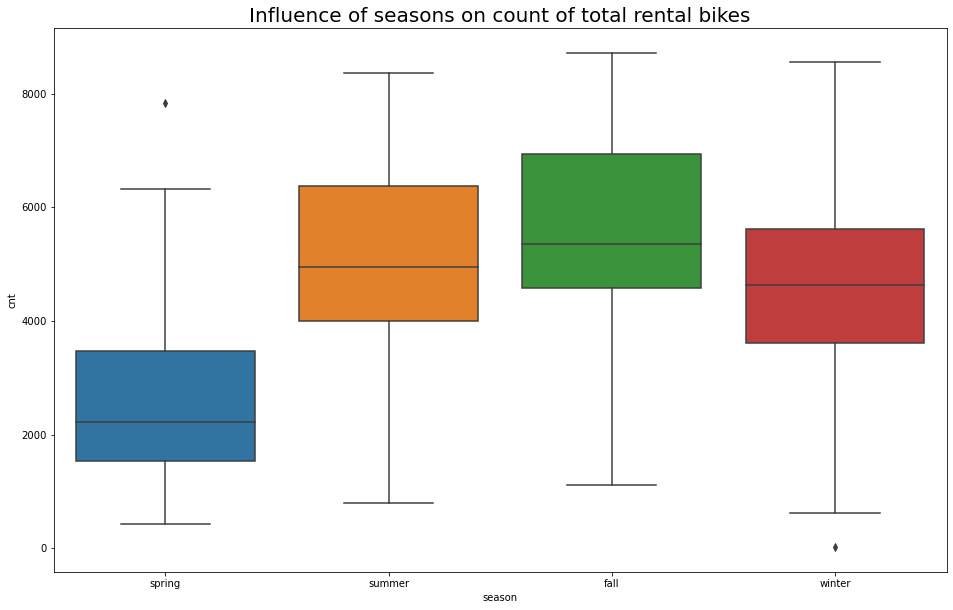

In [16]:
boxplot('season','cnt',df,"Influence of seasons on count of total rental bikes")

- Fall seems to be the season when majority of bike rentals occurs followed by summer and winter. The least amount of bike bookings occurs in spring.

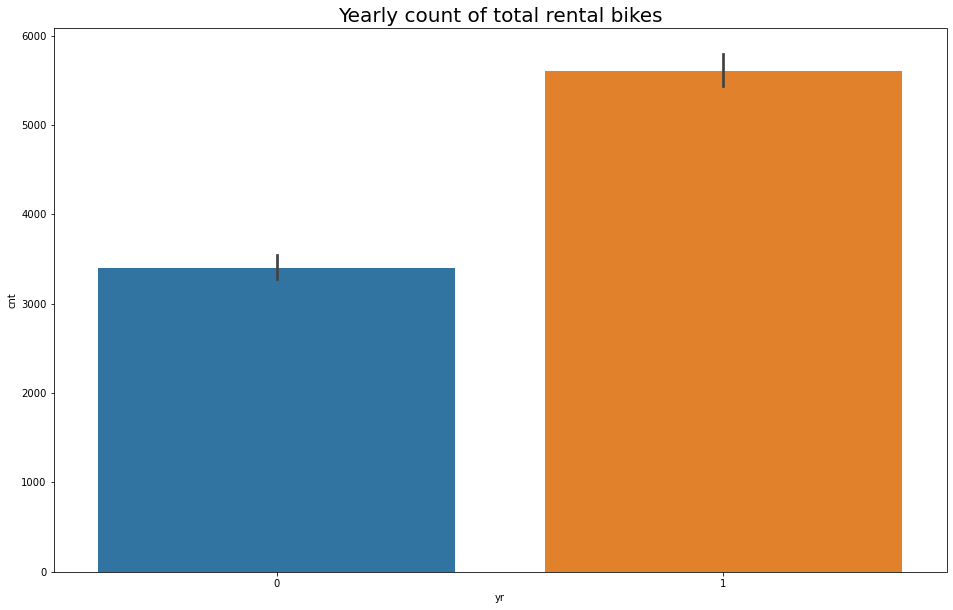

In [17]:
barplot('yr','cnt',df,"Yearly count of total rental bikes")

- The average rental count of bikes has increased in 2019 (denoted as yr = 1 in the data) compared to 2018 (denoted as yr = 0 in the data)

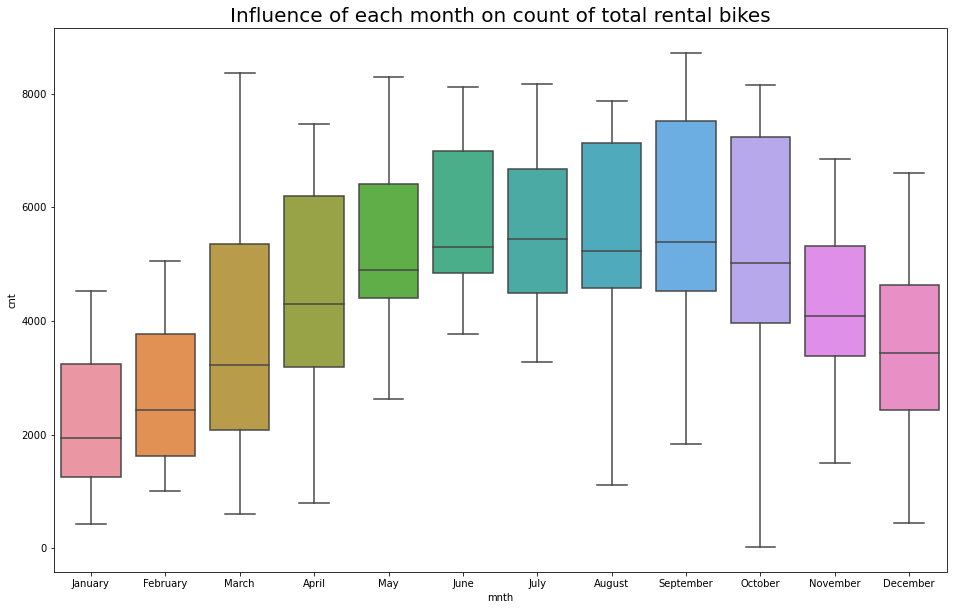

In [18]:
boxplot('mnth','cnt',df,"Influence of each month on count of total rental bikes")

- Starting from January the count of rented bikes increases steadily till July where it dips a bit and again picks up pace till September where it registers maximum rentals and then the rental couts decreases.

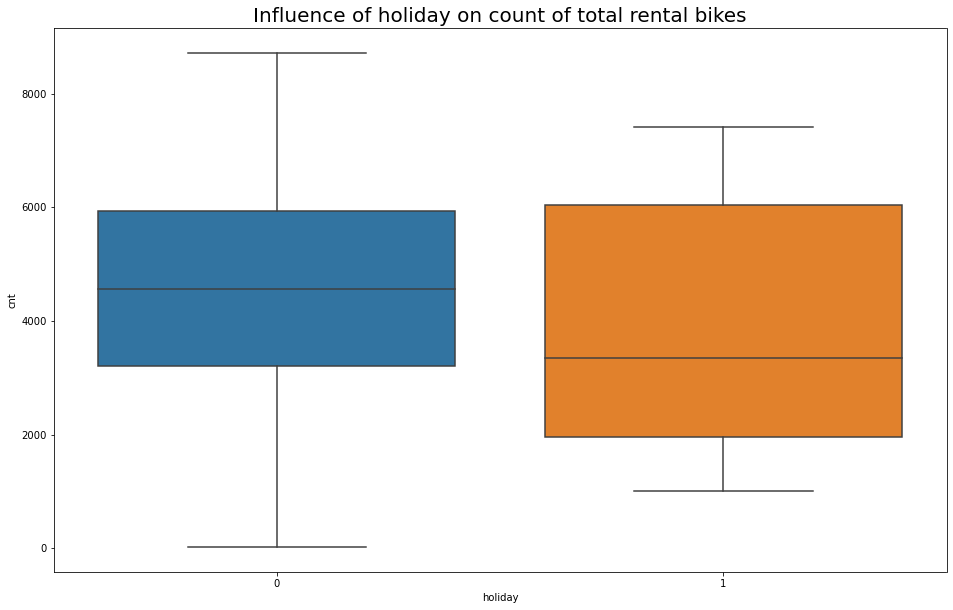

In [19]:
boxplot('holiday','cnt',df,"Influence of holiday on count of total rental bikes")

- When there is a holiday median demand has decreased.

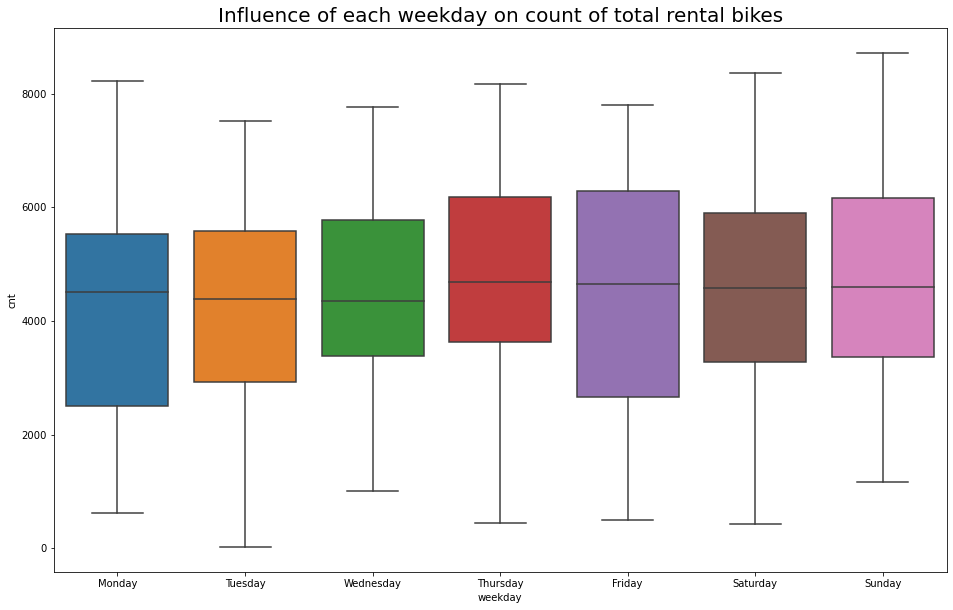

In [20]:
boxplot('weekday','cnt',df,"Influence of each weekday on count of total rental bikes")

- No discernible trend is observed here

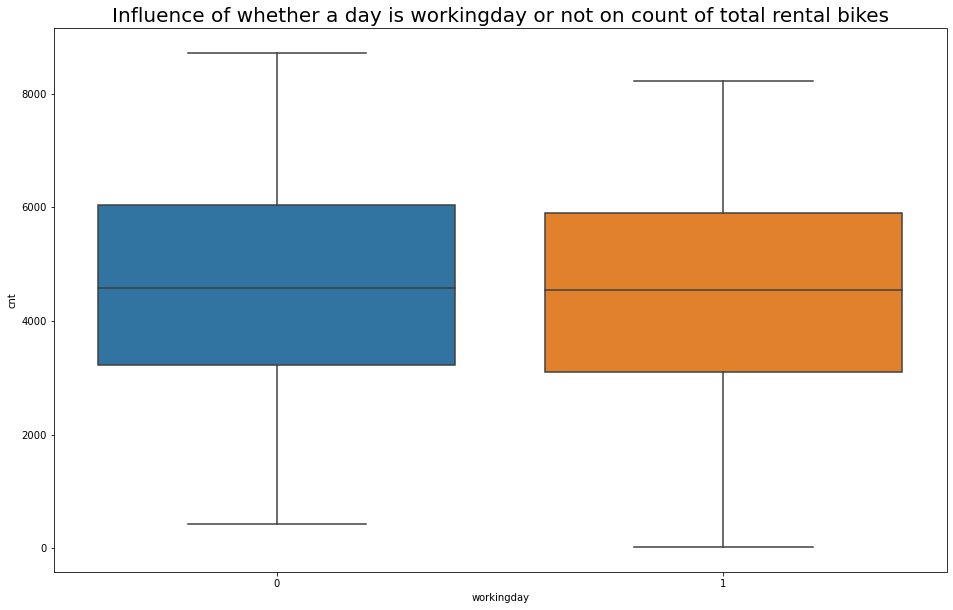

In [21]:
boxplot('workingday','cnt',df,"Influence of whether a day is workingday or not on count of total rental bikes")

- No discernible trend is observed here

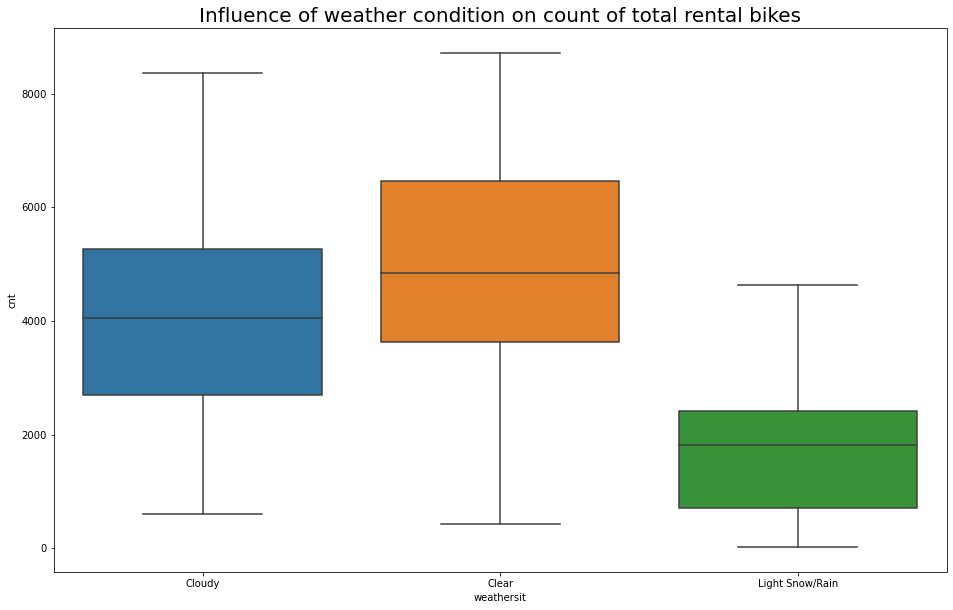

In [22]:
boxplot('weathersit','cnt',df,"Influence of weather condition on count of total rental bikes")

- Total rental count of bikes seems to be higher when the weather is clear.

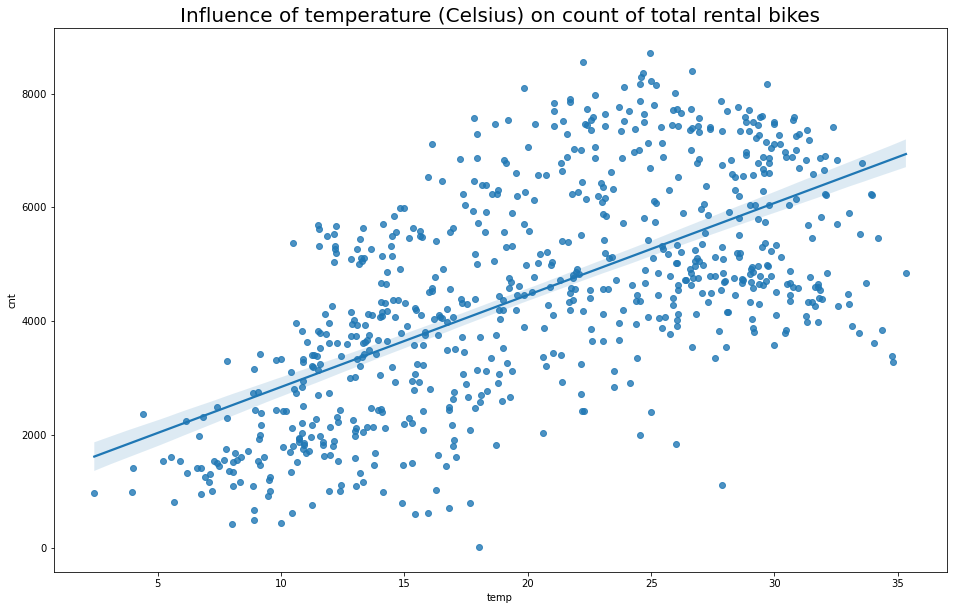

In [23]:
regplot('temp','cnt',df,"Influence of temperature (Celsius) on count of total rental bikes")

- Total rental count of bikes seems to have a positive co-relation with temperature (Celsius) and the relationship also seems to be linear in nature.

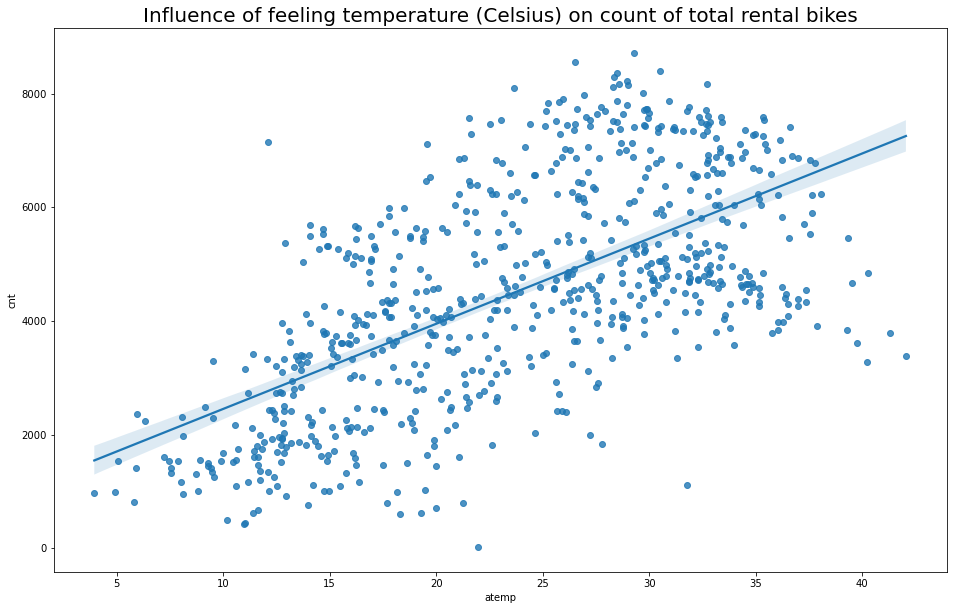

In [24]:
regplot('atemp','cnt',df,"Influence of feeling temperature (Celsius) on count of total rental bikes")

- Total rental count of bikes seems to have a positive co-relation with feeling temperature (Celsius) and the relationship also seems to be linear in nature.

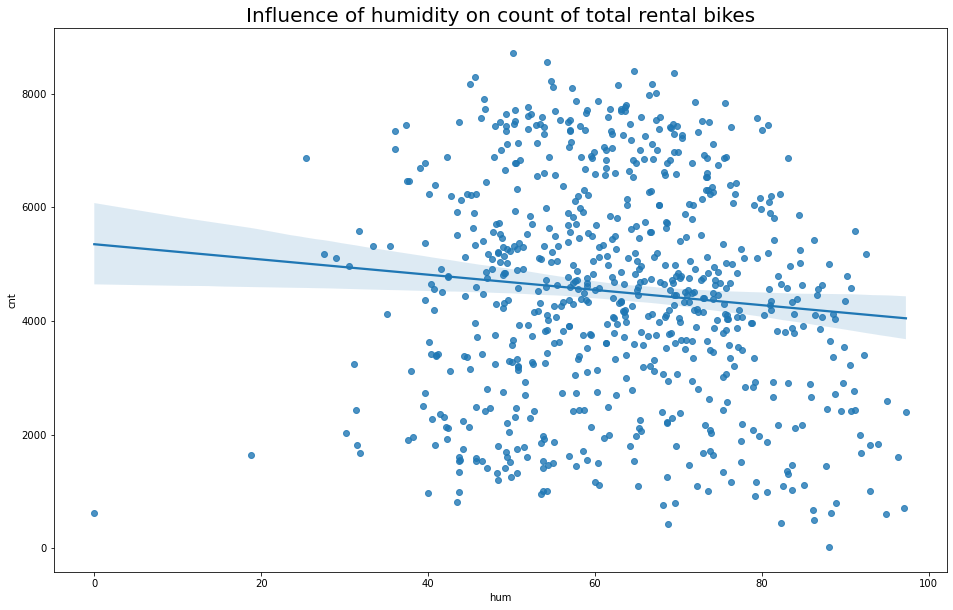

In [25]:
regplot('hum','cnt',df,"Influence of humidity on count of total rental bikes")

- Total rental count of bikes seems not having a clear/linear relationship with humidity as the values seems clustered around a central point.

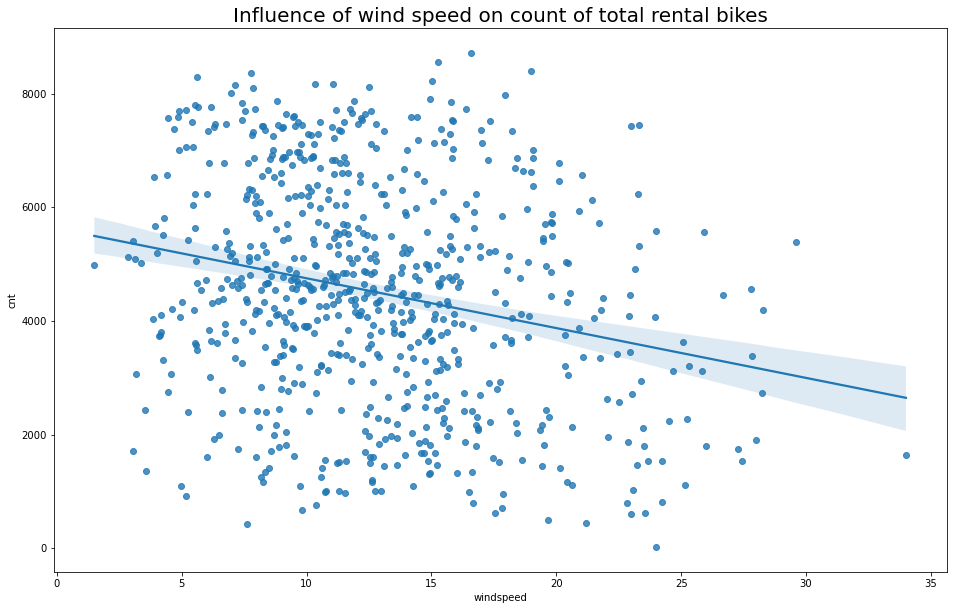

In [26]:
regplot('windspeed','cnt',df,"Influence of wind speed on count of total rental bikes")

- Total rental count of bikes seems not having a clear relationship with humidity as the values seems scattered around a central point. Although we see that the rental count is decreasing as windspeed values are going up.

## Checking correlation between continuous variables

In [27]:
df_corr = df[[ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

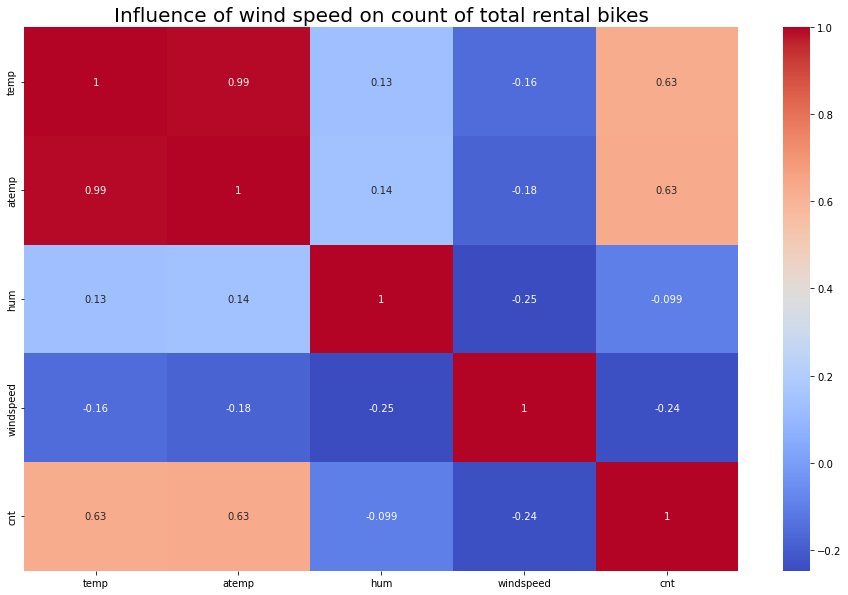

In [28]:
plt.figure(figsize=[16,10])
plt.title("Influence of wind speed on count of total rental bikes", fontsize=20)
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

- As evident from the above heatmap, the independent varibales temp and atemp are highly correlated (0.99).

- I will drop the variable atemp from the data set, to ensure that the numeric continuous features are not multicolinear.

In [29]:
df.drop(['atemp'], axis=1, inplace=True)

In [30]:
df_corr.drop(['atemp'], axis=1, inplace=True)

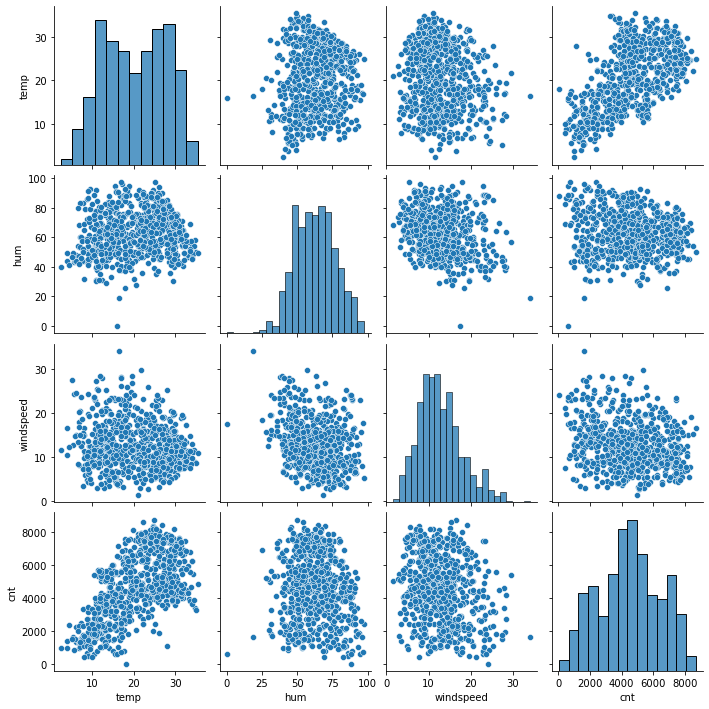

In [31]:
sns.pairplot(df_corr)
plt.show()

The above Pair-Plot tells us that there is a high linear correlation between 'temp' and 'cnt'

## Converting categorical variables to dummy variables for use in regression model

In [32]:
# to get N-1 categorical dummies from N categorical features
df_dummies = pd.get_dummies(data=df, columns=['season', 'mnth', 'weekday'], drop_first=True)

In [33]:
df_dummies.head(10)

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,Clear,8.378268,51.8261,6.000868,1606,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,Cloudy,8.057402,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,Cloudy,6.765000,53.5833,17.875868,959,1,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,1,Clear,5.671653,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,1,Clear,6.184153,48.2917,14.958889,1321,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_dummies.shape

(730, 28)

- Feature **'weathersit'** has 4 catgories but only 3 are used in the data at hand, so _drop_first=True_ is not being used on it

In [35]:
df_dummies_weathersit = pd.get_dummies(data=df, columns=['weathersit'])
df_dummies_weathersit.head(10)

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_Clear,weathersit_Cloudy,weathersit_Light Snow/Rain
0,spring,0,January,0,Monday,1,14.110847,80.5833,10.749882,985,0,1,0
1,spring,0,January,0,Tuesday,1,14.902598,69.6087,16.652113,801,0,1,0
2,spring,0,January,0,Wednesday,1,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,January,0,Thursday,1,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,January,0,Friday,1,9.305237,43.6957,12.522300,1600,1,0,0
5,spring,0,January,0,Saturday,0,8.378268,51.8261,6.000868,1606,1,0,0
6,spring,0,January,0,Sunday,0,8.057402,49.8696,11.304642,1510,0,1,0
7,spring,0,January,0,Monday,1,6.765000,53.5833,17.875868,959,0,1,0
8,spring,0,January,0,Tuesday,1,5.671653,43.4167,24.250650,822,1,0,0
9,spring,0,January,0,Wednesday,1,6.184153,48.2917,14.958889,1321,1,0,0


In [36]:
intermediate_df = df_dummies_weathersit[['weathersit_Clear', 'weathersit_Cloudy','weathersit_Light Snow/Rain']].copy()

### Adding weathersit dummy variables with the earlier created dummy dataframe of rest of the variables

In [37]:
df_dummies.drop('weathersit', axis=1, inplace=True)

In [38]:
df_dummies.shape

(730, 27)

In [39]:
df_final = pd.concat([df_dummies, intermediate_df], axis=1)
df_final.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Cloudy,weathersit_Light Snow/Rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,1,6.765000,53.5833,17.875868,959,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,1,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,0,1,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,0,0,0,0,1,1,0,0


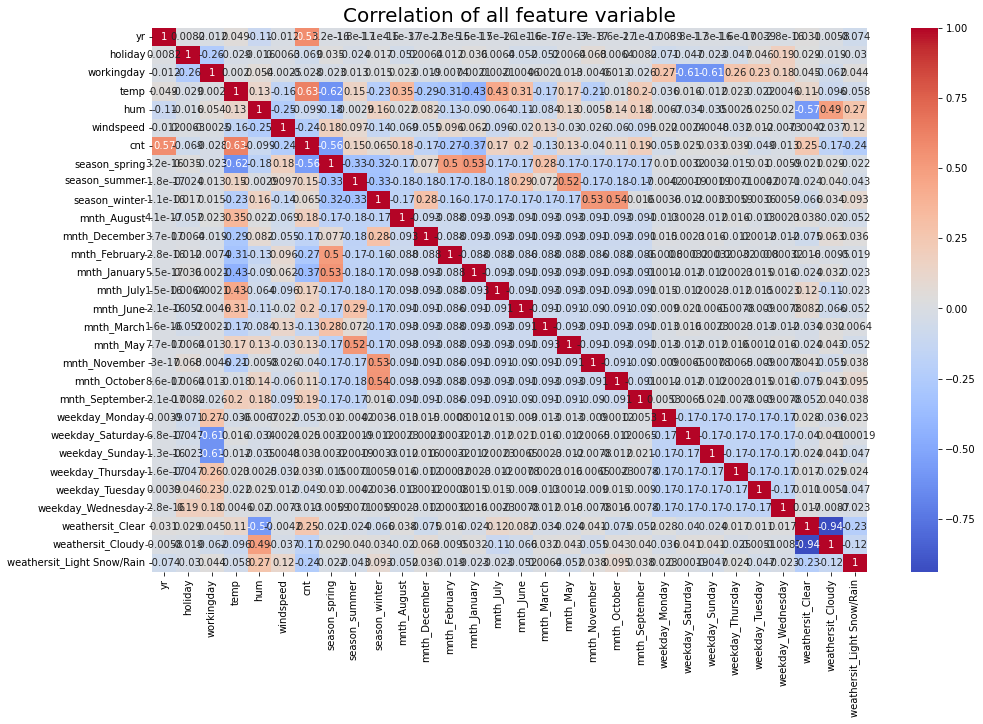

In [40]:
plt.figure(figsize=[16,10])
plt.title("Correlation of all feature variable", fontsize=20)
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
df_final.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Light Snow/Rain'],
      dtype='object')

## Splitting data into Train and Test

In [42]:
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
df_train.shape

(510, 30)

In [44]:
df_test.shape

(219, 30)

## Scaling and Fitting of Training data

In [45]:
# List of continuous variables
columns_to_scale = ['temp','hum','windspeed', 'cnt']

#Using Standardize Scaler
scaler = StandardScaler()

#Fit and transform training data
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

### Splitting into X_train and y_train after scaling

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

## Using RFE to prepare a base Linear Regression model

In [47]:
# Running RFE with the output number of the variable equal to 15
lrm = LinearRegression()
lrm.fit(X_train, y_train)

rfe = RFE(lrm, 15)             # running RFE with 15 features
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', False, 7),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', False, 15),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow/Rain', True, 1)]

In [49]:
rfe_support_cols = X_train.columns[rfe.support_]
rfe_support_cols

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Clear',
       'weathersit_Cloudy', 'weathersit_Light Snow/Rain'],
      dtype='object')

In [50]:
column_list = list(X_train.columns[rfe.support_])

In [51]:
column_list

['yr',
 'holiday',
 'temp',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_December',
 'mnth_February',
 'mnth_January',
 'mnth_July',
 'mnth_November',
 'mnth_September',
 'weathersit_Clear',
 'weathersit_Cloudy',
 'weathersit_Light Snow/Rain']

## Model building

### Model 1 based on all the columns suggested by RFE

In [52]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.99e-179
Time:                        23:11:57   Log-Likelihood:                -275.05
No. Observations:                 510   AIC:                             580.1
Df Residuals:                     495   BIC:                             643.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
calculate_vif(column_list)

                      Features   VIF
12            weathersit_Clear  8.88
3                season_spring  5.58
13           weathersit_Cloudy  5.23
2                         temp  4.33
5                season_winter  3.69
4                season_summer  2.75
8                 mnth_January  2.30
7                mnth_February  1.86
10               mnth_November  1.80
6                mnth_December  1.61
9                    mnth_July  1.48
14  weathersit_Light Snow/Rain  1.35
11              mnth_September  1.33
1                      holiday  1.04
0                           yr  1.02


## Fine Tuning of base model basis p-values and VIF

### Model 2

In [54]:
column_list.remove('weathersit_Cloudy') # high p-value

In [55]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.99e-179
Time:                        23:11:57   Log-Likelihood:                -275.05
No. Observations:                 510   AIC:                             580.1
Df Residuals:                     495   BIC:                             643.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
calculate_vif(column_list)

                      Features   VIF
3                season_spring  4.21
2                         temp  3.07
5                season_winter  2.76
12            weathersit_Clear  2.58
8                 mnth_January  2.38
0                           yr  1.98
7                mnth_February  1.94
10               mnth_November  1.89
6                mnth_December  1.66
4                season_summer  1.49
9                    mnth_July  1.45
11              mnth_September  1.18
13  weathersit_Light Snow/Rain  1.09
1                      holiday  1.06


### Model 3

In [57]:
column_list.remove('season_summer') # high p-value

In [58]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.63e-179
Time:                        23:11:57   Log-Likelihood:                -276.00
No. Observations:                 510   AIC:                             580.0
Df Residuals:                     496   BIC:                             639.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
calculate_vif(column_list)

                      Features   VIF
3                season_spring  3.97
2                         temp  3.02
4                season_winter  2.61
7                 mnth_January  2.38
11            weathersit_Clear  2.13
6                mnth_February  1.94
9                mnth_November  1.88
0                           yr  1.77
5                mnth_December  1.66
8                    mnth_July  1.41
10              mnth_September  1.16
12  weathersit_Light Snow/Rain  1.07
1                      holiday  1.06


### Model 4

In [60]:
column_list.remove('mnth_February') # high p-value

In [61]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.48e-180
Time:                        23:11:57   Log-Likelihood:                -277.42
No. Observations:                 510   AIC:                             580.8
Df Residuals:                     497   BIC:                             635.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
calculate_vif(column_list)

                      Features   VIF
2                         temp  2.90
3                season_spring  2.90
4                season_winter  2.59
10            weathersit_Clear  2.12
8                mnth_November  1.85
0                           yr  1.76
6                 mnth_January  1.72
5                mnth_December  1.53
7                    mnth_July  1.40
9               mnth_September  1.16
11  weathersit_Light Snow/Rain  1.07
1                      holiday  1.06


### Model 5

In [63]:
column_list.remove('mnth_January') # high p-value

In [64]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.34e-180
Time:                        23:11:57   Log-Likelihood:                -279.54
No. Observations:                 510   AIC:                             583.1
Df Residuals:                     498   BIC:                             633.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [65]:
calculate_vif(column_list)

                      Features   VIF
2                         temp  2.73
4                season_winter  2.59
3                season_spring  2.58
9             weathersit_Clear  2.12
7                mnth_November  1.83
0                           yr  1.75
5                mnth_December  1.47
6                    mnth_July  1.38
8               mnth_September  1.15
10  weathersit_Light Snow/Rain  1.07
1                      holiday  1.06


### Model 6

In [66]:
column_list.remove('mnth_December') # high p-value

In [67]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.68e-181
Time:                        23:11:57   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
calculate_vif(column_list)

                     Features   VIF
2                        temp  2.63
3               season_spring  2.58
4               season_winter  2.14
8            weathersit_Clear  2.11
0                          yr  1.75
6               mnth_November  1.59
5                   mnth_July  1.37
7              mnth_September  1.15
9  weathersit_Light Snow/Rain  1.07
1                     holiday  1.06


### Model 7

In [69]:
column_list.remove('mnth_November') # high p-value

In [70]:
lrm_sm = stats_model(column_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.16e-181
Time:                        23:11:58   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
calculate_vif(column_list)

                     Features   VIF
2                        temp  2.59
3               season_spring  2.55
7            weathersit_Clear  2.10
0                          yr  1.75
4               season_winter  1.71
5                   mnth_July  1.37
6              mnth_September  1.15
8  weathersit_Light Snow/Rain  1.07
1                     holiday  1.04


The R2, adjusted R2 score are near and F-statistics score is high. All indicative of a good model.

In [72]:
fitted_value = lrm_sm.fittedvalues

In [73]:
residuals = lrm_sm.resid

## Model Evaluation

### Distribution of the error terms (residuals)
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

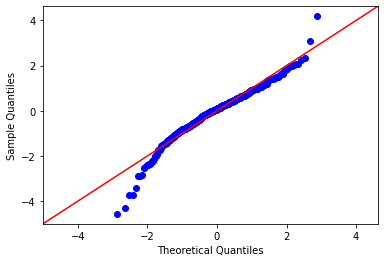

In [94]:
# plotting QQ plot of residuals to check for normality
fig = sm.qqplot(residuals,fit=True, line="45")
plt.show(fig)

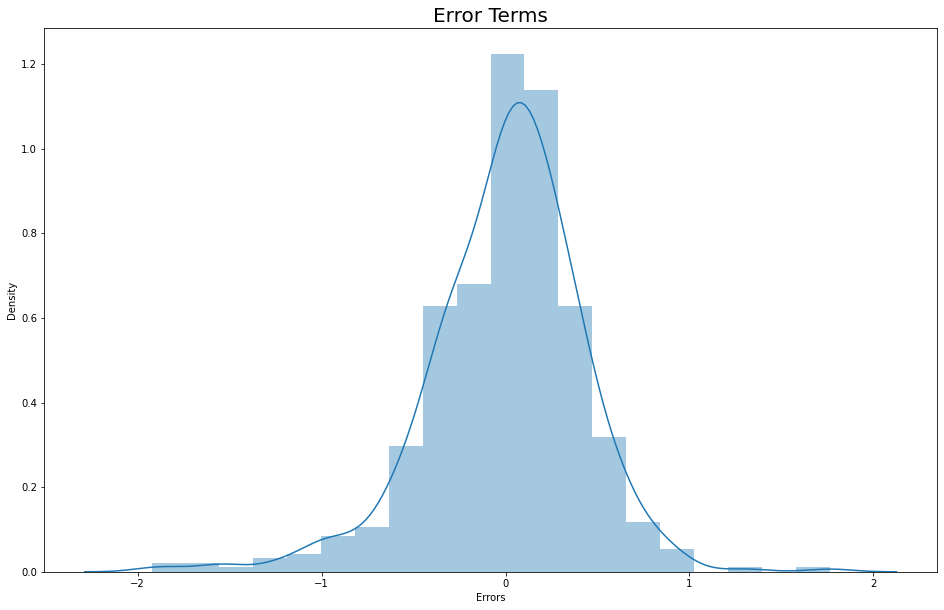

In [75]:
plt.figure(figsize=[16,10])
plt.title('Error Terms',fontsize=20)
sns.distplot(residuals, bins = 20)
plt.xlabel('Errors')
plt.show()

From the above two plots it's sure that the **residuals are normally distributed**. 

### Looking for patterns in the residuals

In [76]:
df_for_residplot = pd.concat([X_train[column_list], y_train], axis=1)

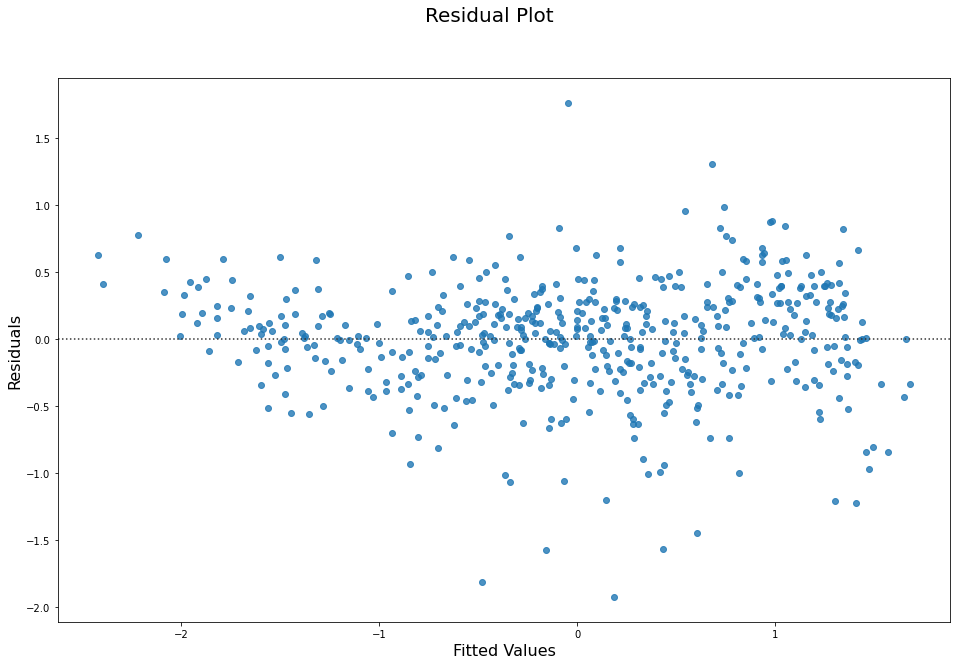

In [77]:
plt.figure(figsize=[16,10])
fig = sns.residplot(fitted_value,df_for_residplot.columns[-1], data=df_for_residplot)
plt.suptitle('Residual Plot', fontsize = 20)
plt.xlabel('Fitted Values', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.show(fig)

The equally spread residuals around a horizontal line without distinct patterns are a good indication of **having the linear relationships**.

In [78]:
model_norm_residuals = lrm_sm.get_influence().resid_studentized_internal

In [79]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

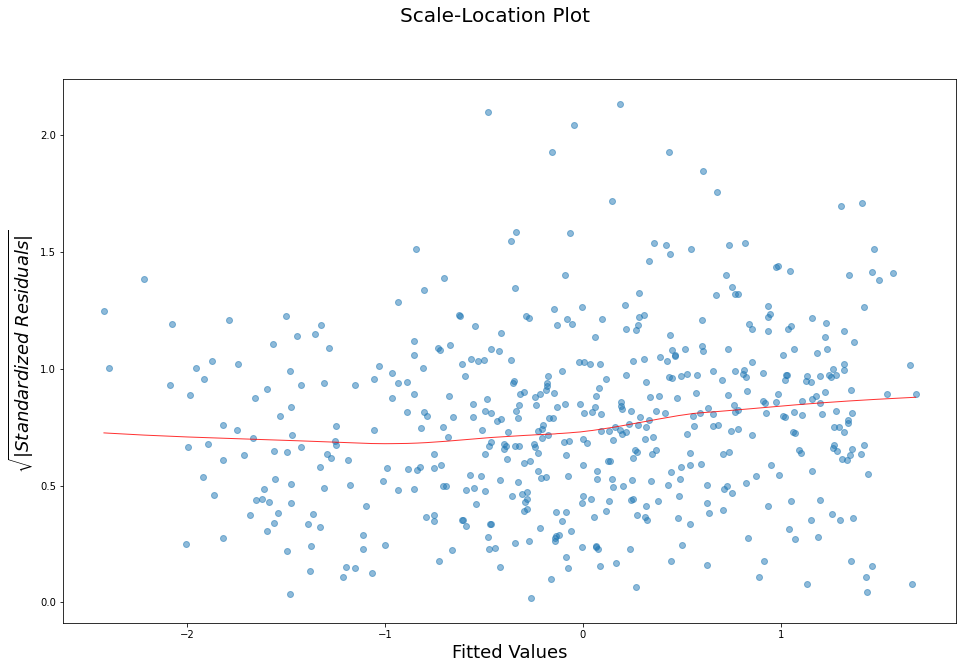

In [80]:
plt.figure(figsize=[16,10])
plt.scatter(fitted_value, model_norm_residuals_abs_sqrt, alpha=0.5);
fig = sns.regplot(fitted_value, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.suptitle('Scale-Location Plot', fontsize = 20)
plt.xlabel('Fitted Values', fontsize = 18)
plt.ylabel('$\sqrt{|Standardized\ Residuals|}$', fontsize = 18)
plt.show(fig)

The near horizontal red line proves that the **residuals are Homoscedastic**.

### Computing R-square for train set

In [81]:
X_train_const = sm.add_constant(X_train[column_list])

y_train_pred = lrm_sm.predict(X_train_const)

In [82]:
r_squared_train = r2_score(y_train, y_train_pred)

In [83]:
r_squared_train

0.8225173906649429

## Running the model on test set

In [84]:
# List of continuous variables
columns_to_scale = ['temp','hum','windspeed', 'cnt']

#Transforming the test data.
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

In [85]:
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
X_test_const = sm.add_constant(X_test[column_list])

In [87]:
y_test_pred = lrm_sm.predict(X_test_const)

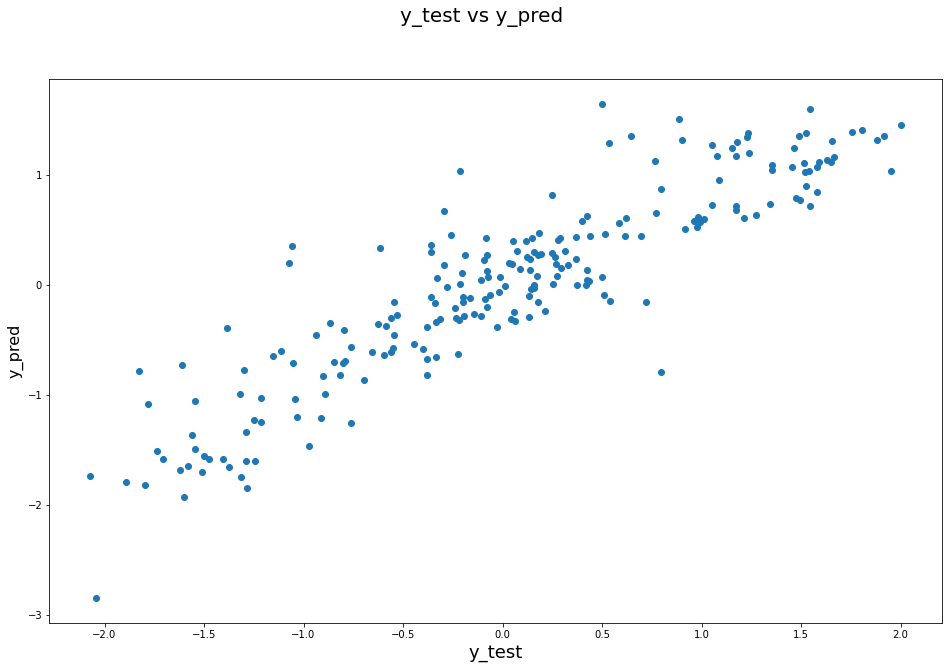

In [88]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=[16,10])
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  
plt.show(fig)

### Computing R-square for test set

In [89]:
r_squared_test = r2_score(y_test, y_test_pred)

In [90]:
r_squared_test

0.8092200832884747

R2 value for predictions on test data is 0.809 which is near the  R2 value of train data 0.822. Hence we can see our model is performing good even on unseen data.

### Computing adjusted R-square for test set

In [91]:
# n is number of rows in X

n = X_test.shape[0]


# Number of predictors, p
p = X_test.shape[1]

# Adjusted R2

adjusted_r2 = 1-(1-r_squared_test)*(n-1)/(n-p-1)
adjusted_r2

0.7799469743750661

The R2, adjusted R2 score are near. All indicative of a good performance of our model even on unseen data.

## Model Explanation

#### Weightages of each features as considered by the model:

$ cnt = -0.651 + 1.038  \times  yr - 0.450  \times  holiday + 0.473 \times temp - 0.493 \times season(spring) + 0.248 \times season(winter) - 0.306 \times mnth(July) + 0.293 \times mnth(September) + 0.354 \times weathersit(Clear) - 0.983 \times weathersit(Light Snow/Rain) $

#### Based on our model, the significant variables in predicting the demand for shared bikes are:
- weathersit
- temp
- season 
- mnth
- yr
- holiday

Thus, based on all our previous observations and our model, it can be summarized that:
> **Factors that contribute in demand positively are**:
> - clear weather
> - temp
> - seasons (except spring)

> **Factors that contribute in demand negatively are**:
> - holiday
> - season (spring)
> - Snow/Rainy weather